# Task 4 - Change of patterns throughout the dataset

This code will produce a horizontal stacked bar chart where each bar represents a month, and the segments within each bar show the distribution of check-ins across different venue types.

/var/folders/5b/lx_h1w013634ddq6xwrjnf500000gn/T/ipykernel_99511/3407417703.py:13: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['timestamp'].dt.to_period('M')


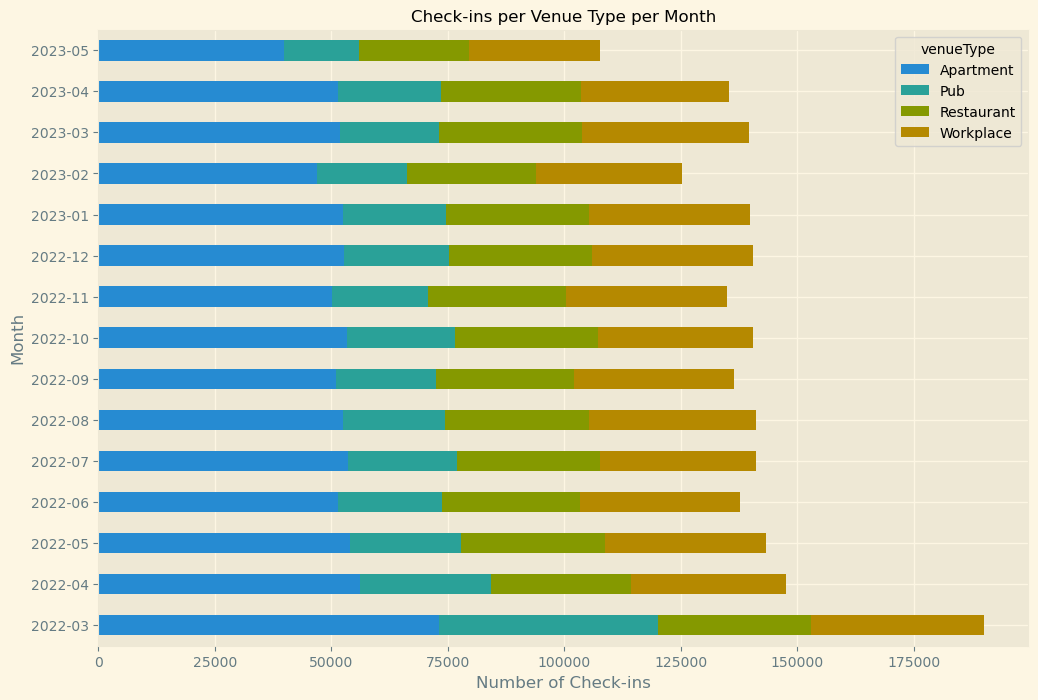

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('../Datasets/Journals/CheckinJournal.csv')

# Convert the timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])



# Extract year-month from the timestamp for grouping
df['year_month'] = df['timestamp'].dt.to_period('M')

# Group by venue type and year-month, and count the number of check-ins
checkin_counts = df.groupby(['venueType', 'year_month']).size().unstack(fill_value=0)

# Plotting
with plt.style.context('Solarize_Light2'):	
	checkin_counts.T.plot(kind='barh', stacked=True, figsize=(12, 8))

# Add title and labels
plt.title('Check-ins per Venue Type per Month')
plt.xlabel('Number of Check-ins')
plt.ylabel('Month')

# Show the plot

plt.show()


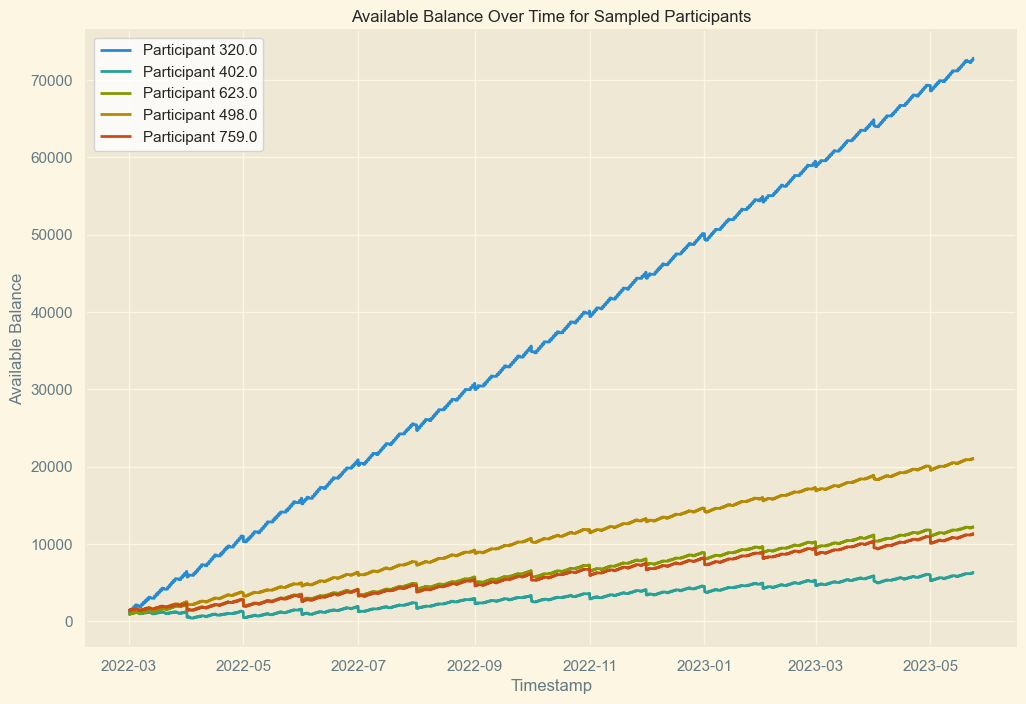

In [42]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

# Get a list of file paths for all CSV files in the folder
csv_files = glob.glob('../Datasets/Activity Logs/*.csv')

# Read each CSV file and store the data in a list of dataframes
dataframes = []
for file in csv_files:
    df = pd.read_csv(file)
    dataframes.append(df)

# Concatenate all dataframes into a single dataframe
combined_df = pd.concat(dataframes)

# Sample 5 participant IDs
sample_participantIds = combined_df['participantId'].sample(n=5, random_state=42)

# Filter the dataframe to include only the sampled participant IDs
combined_df = combined_df[combined_df['participantId'].isin(sample_participantIds)]

# Ensure the timestamp column is in datetime format
combined_df['timestamp'] = pd.to_datetime(combined_df['timestamp'])

# Sort the dataframe by timestamp
combined_df = combined_df.sort_values('timestamp')

# Plotting availableBalance over time for each participant
with plt.style.context('Solarize_Light2'):
    plt.figure(figsize=(12, 8))
    for participant_id in sample_participantIds:
        participant_df = combined_df[combined_df['participantId'] == participant_id]
        plt.plot(participant_df['timestamp'], participant_df['availableBalance'], label=f'Participant {participant_id}')

# Add title and labels
plt.title('Available Balance Over Time for Sampled Participants')
plt.xlabel('Timestamp')
plt.ylabel('Available Balance')
plt.legend()

# Show the plot
plt.show()


In [6]:
import pandas as pd
import plotly.graph_objects as go

# Load the data from the CSV file
df = pd.read_csv('../Datasets/Journals/FinancialJournal.csv')

# Convert the timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Filter the data to include only the Wage category
wage_data = df[df['category'] == 'Wage']

# Select 5 participants (you can change these IDs as needed)
selected_participants = [320, 402, 623, 498, 759]
selected_wage_data = wage_data[wage_data['participantId'].isin(selected_participants)]

# Create a histogram plot for each selected participant
fig = go.Figure()

for participant_id in selected_participants:
    participant_data = selected_wage_data[selected_wage_data['participantId'] == participant_id]
    fig.add_trace(go.Histogram(
        x=participant_data['timestamp'],
        y=participant_data['amount'],
        name=f'Participant {participant_id}',
        histfunc='sum',
        xbins=dict(
            start=participant_data['timestamp'].min(),
            end=participant_data['timestamp'].max(),
            size='W'  # Weekly bins
        )
    ))

# Update layout
fig.update_layout(
    barmode='group',  # Group bars next to each other
    title='Weekly Wage Distribution for Selected Participants',
    xaxis_title='Date',
    yaxis_title='Total Wage Amount',
    bargap=0.2
)

# Show the plot
fig.show()


/var/folders/5b/lx_h1w013634ddq6xwrjnf500000gn/T/ipykernel_4073/3608006147.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_participants['checkInTime'] = pd.to_datetime(filtered_participants['checkInTime'])
/var/folders/5b/lx_h1w013634ddq6xwrjnf500000gn/T/ipykernel_4073/3608006147.py:23: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  filtered_participants['year_month'] = filtered_participants['checkInTime'].dt.to_period('M')
/var/folders/5b/lx_h1w013634ddq6xwrjnf500000gn/T/ipykernel_4073/3608006147.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

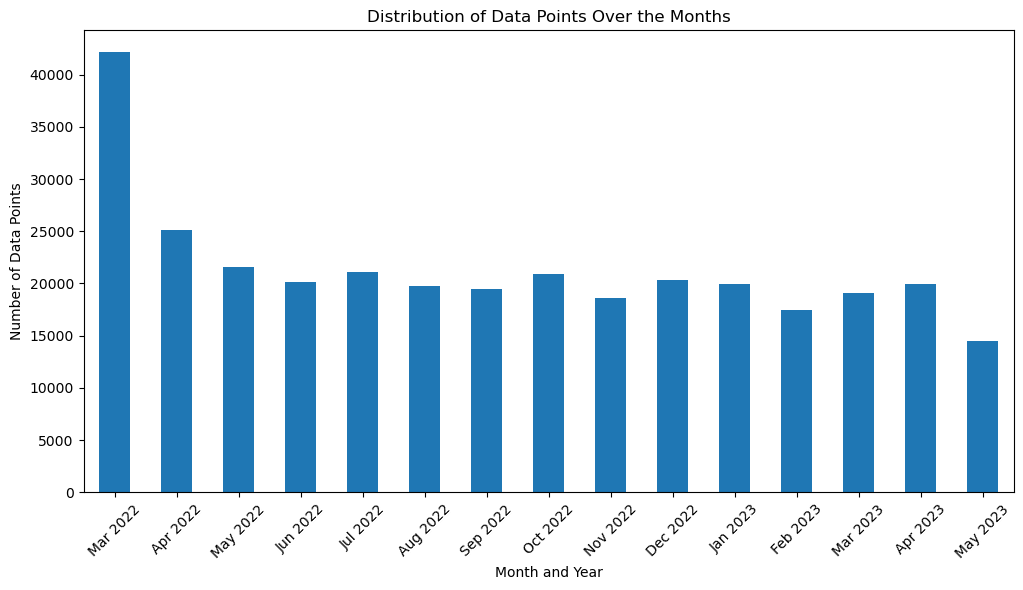

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV file
participants = pd.read_csv('../Datasets/Journals/TravelJournal.csv')

# Drop unnecessary columns
participants.drop(['travelStartLocationId', 'travelEndTime', 'travelEndLocationId', 'travelStartTime', 'checkOutTime', 'startingBalance', 'endingBalance'], axis=1, inplace=True)

# Filter rows where 'purpose' is social
filtered_participants = participants[participants['purpose'] == 'Recreation (Social Gathering)']

# Convert 'travelStartTime' to datetime
filtered_participants['checkInTime'] = pd.to_datetime(filtered_participants['checkInTime'])

# Filter out 1 random participant ID
# random_participant_id = filtered_participants['participantId'].sample(n=1).iloc[0]
# print(random_participant_id)
# filtered_participants = filtered_participants[filtered_participants['participantId'] != random_participant_id]

# Extract the month and year from 'travelStartTime'
filtered_participants['year_month'] = filtered_participants['checkInTime'].dt.to_period('M')

# Visualize the distribution of datapoints over the months
plt.figure(figsize=(12, 6))
filtered_participants['year_month'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Month and Year')
plt.ylabel('Number of Data Points')
plt.title('Distribution of Data Points Over the Months')

# Set custom x-ticks and labels
date_range = pd.date_range(start='2022-03-01', end='2023-05-31', freq='M')
plt.xticks(ticks=range(len(date_range)), labels=[date.strftime('%b %Y') for date in date_range], rotation=45)
plt.show()
